In [1]:
import numpy as np
import numpy
import datetime
import pandas as pd
from datetime import datetime
import vaex as vx

In [2]:
import matplotlib.pyplot as plt
from  plotly.offline import iplot
import plotly as py 
import plotly.express as px

In [3]:
import cufflinks as cf 
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
def convert_to_datetime(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%d/%m/%Y %H:%M:%S'))

def convert_to_date(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%d/%m/%Y'))

def check_wekend(date_string):
    a = datetime.strptime(str(date_string), '%d/%m/%Y')
    weekno = a.weekday()
    if weekno < 5:
        return "Weekday"
    else:  # 5 Sat, 6 Sun
        return "Weekend"
    
def check_month(i):
    if i <= 10:
        return "July-Oct"
    else:
        return "Nov-Dec"
    
def run_preprocess(data):
    data['date_time']  = (data['TICKET DATE'] + ' ' + data['TICKET TIME']).apply(convert_to_datetime)
    data['ticket_date']  = data['TICKET DATE'].apply(convert_to_date)
    data["Day"] = data["date_time"].dt.day_name()
    data["Hour"] = data["date_time"].dt.hour
    data["Month"] = data["date_time"].dt.month
    data['day_type'] = data['TICKET DATE'].apply(check_wekend)
    data['Period'] = data['Month'].apply(check_month)

In [5]:
data = pd.read_csv('717AUP.csv')

In [6]:
run_preprocess(data)

In [7]:
data = data[data['ticket_date'] != '2019-08-15']

In [8]:
data

,MESSAGE_ID,TRIP_ID,ROUTENAME,BUS_ID,ROUTE_ORIGIN_STOP,ROUTE_DESTINATION_STOP,TRIP_START_TIME,TRIP_END_TIME,AMOUNT,USER_COUNT,...,TICKET TIME,date_time,ticket_date,Day,Hour,Month,Origin_cordinates,Dest_cordinates,day_type,Period
0,12695010919065107,T12695010919061902,717AUP,DL1PC6341,Andheria Bagh More,Kapashera Border,01-SEP-2019 06:19:46,01-SEP-2019 07:19:28,15,1,...,06:51:55,2019-09-01 06:51:55,2019-09-01,Sunday,6,9,"(28.509217, 77.178967)","(28.522481, 77.082442)",Weekend,July-Oct
1,12420010919084834,T12420010919074802,717AUP,DL1PC6354,Andheria Bagh More,Kapashera Border,01-SEP-2019 07:48:00,01-SEP-2019 09:26:48,15,1,...,08:48:17,2019-09-01 08:48:17,2019-09-01,Sunday,8,9,"(28.509217, 77.178967)","(28.522481, 77.082442)",Weekend,July-Oct
2,12420010919084835,T12420010919074802,717AUP,DL1PC6354,Andheria Bagh More,Kapashera Border,01-SEP-2019 07:48:00,01-SEP-2019 09:26:48,15,1,...,08:48:19,2019-09-01 08:48:19,2019-09-01,Sunday,8,9,"(28.509217, 77.178967)","(28.522481, 77.082442)",Weekend,July-Oct
3,12678010919095238,T12678010919084802,717AUP,DL1PC6308,Andheria Bagh More,Kapashera Border,01-SEP-2019 08:48:17,01-SEP-2019 10:34:02,15,1,...,09:52:32,2019-09-01 09:52:32,2019-09-01,Sunday,9,9,"(28.509217, 77.178967)","(28.522481, 77.082442)",Weekend,July-Oct
4,10592010919093428,T10592010919083602,717AUP,DL1P6359,Andheria Bagh More,Kapashera Border,01-SEP-2019 08:36:05,01-SEP-2019 10:10:08,15,1,...,09:34:44,2019-09-01 09:34:44,2019-09-01,Sunday,9,9,"(28.509217, 77.178967)","(28.522481, 77.082442)",Weekend,July-Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393478,11333291219103256,T11333291219102504,717AUP,DL1PC6350,Badarpur Border,Kapashera Border,29-DEC-2019 10:25:06,29-DEC-2019 11:51:02,15,1,...,10:32:27,2019-12-29 10:32:27,2019-12-29,Sunday,10,12,"(28.4927, 77.30381700000002)","(28.522481, 77.082442)",Weekend,Nov-Dec
1393479,11333291219103257,T11333291219102504,717AUP,DL1PC6350,Badarpur Border,Tughalqabad Village,29-DEC-2019 10:25:06,29-DEC-2019 11:51:02,5,1,...,10:32:31,2019-12-29 10:32:31,2019-12-29,Sunday,10,12,"(28.4927, 77.30381700000002)","(28.509067, 77.265117)",Weekend,Nov-Dec
1393480,11311291219201613,T11311291219185703,717AUP,DL1PC 6357,Hamdard Nagar / Sangam Vihar,Kapashera Border,29-DEC-2019 18:57:26,29-DEC-2019 21:17:04,15,1,...,20:16:45,2019-12-29 20:16:45,2019-12-29,Sunday,20,12,"(28.512167, 77.248667)","(28.522481, 77.082442)",Weekend,Nov-Dec
1393481,11311291219202124,T11311291219185703,717AUP,DL1PC 6357,Hamdard Nagar / Sangam Vihar,Kishan Garh,29-DEC-2019 18:57:26,29-DEC-2019 21:17:04,10,1,...,20:21:08,2019-12-29 20:21:08,2019-12-29,Sunday,20,12,"(28.512167, 77.248667)","(28.514366, 77.16415500000002)",Weekend,Nov-Dec


In [9]:
data_grpd = data.groupby(by=['TRIP_ID','ROUTE_ORIGIN_STOP'])[['USER_COUNT']].sum()
data_grpd.reset_index(inplace=True)

In [10]:
trips = data[['TRIP_ID','TRIP_START_TIME']]

In [11]:
trips.drop_duplicates(inplace=True)
trips

,TRIP_ID,TRIP_START_TIME
0,T12434010719051302,01-JUL-2019 05:13:36
18,T12665010719060902,01-JUL-2019 06:09:20
22,T12263010719061602,01-JUL-2019 06:16:04
23,T10679010719062802,01-JUL-2019 06:28:07
40,T12346010719052502,01-JUL-2019 05:25:12
...,...,...
2170206,T10439281219094204,28-DEC-2019 09:42:20
2170225,T11311291219153701,29-DEC-2019 15:37:19
2170235,T11311291219080002,29-DEC-2019 08:00:41
2170262,T10439281219065702,28-DEC-2019 06:57:55


In [12]:
trips[trips['TRIP_ID'] == 'T10006020719062202']

,TRIP_ID,TRIP_START_TIME
14582,T10006020719062202,02-JUL-2019 06:22:40


In [13]:
data_grpd.head(50)

,TRIP_ID,ROUTE_ORIGIN_STOP,USER_COUNT
0,T10006020719062202,Ambedkar Nagar Terminal / DIPSAR,6
1,T10006020719062202,Andheria Bagh More,9
2,T10006020719062202,Badarpur Border,30
3,T10006020719062202,Hamdard Nagar / Sangam Vihar,29
4,T10006020719062202,Kaya Maya Hospital,4
5,T10006020719062202,Kishan Garh,3
6,T10006020719062202,Mahipal Pur Village,29
7,T10006020719062202,Prehlad Pur,12
8,T10006020719062202,Saidul-A-Jab,2
9,T10006020719062202,Tughalqabad Village,2


In [14]:
route_info = pd.read_csv('717AUP_GTFS_stops_latlong.csv')
route_info

,stop_name,stop_lat,stop_lon
0,Badarpur Border,28.492700,77.303817
1,Jaitpur Crossing,28.497217,77.302647
2,Badarpur M B Road / Rajiv Gandhi Stadium,28.499178,77.299004
3,Prehlad Pur,28.500000,77.294633
4,Surajkund Crossing,28.501700,77.291000
5,Lal Kuan,28.502600,77.284517
6,Prem Nagar,28.504400,77.279300
7,Tuglaqabad MB Road,28.505533,77.276483
8,Kaya Maya Hospital,28.508250,77.269017
9,Tughalqabad Village,28.509067,77.265117


In [15]:
occupancy_list = [0]*len(route_info)
stop_list = list(route_info['stop_name'].values)

In [16]:
full_data = data

In [17]:
all_routes = ['717AUP']

In [20]:
from tqdm import tqdm

In [21]:
column_names = ['TRIP_ID','ROUTE_ORIGIN_STOP','ROUTE_DESTINATION_STOP','USER_COUNT']

full_data = full_data[full_data['date_time'] < '2019-10-26']

occupancy_data = []

for r in all_routes:
    
    gtfs_route = pd.read_csv(f"D:\\Dissertation\\Data\\GTFS_with_trip_length\\{r}.csv",index_col='Unnamed: 0')
    stop_order = list(gtfs_route['stop_name'].values)
    
    top_route_data = full_data[full_data['ROUTENAME'] == r]
    
    d = {}
    for c in column_names:
        d[c] = top_route_data[c].values
    top_route_data_pd = pd.DataFrame(d)
    
    for t in tqdm(top_route_data_pd['TRIP_ID'].unique()):
        
        o_dict = {}
        d_dict = {}
        
        single_trip_data = top_route_data_pd[top_route_data_pd['TRIP_ID'] == t]
        o = single_trip_data.groupby(by='ROUTE_ORIGIN_STOP')["USER_COUNT"].sum()
        d = single_trip_data.groupby(by='ROUTE_DESTINATION_STOP')["USER_COUNT"].sum()
        for s in o.index:
            o_dict[s] = o_dict.get(s,0) + o[s]
        for s in d.index:
            d_dict[s] = d_dict.get(s,0) - d[s]
        
        temp = []
        count = 0
        temp.append(t)
        
        for i in stop_order:
            temp.append(count)
            count += o_dict.get(i,0)
            count += d_dict.get(i,0)
            
        occupancy_data.append(temp)
        
    column = ['TRIP_ID'] + stop_order
    occupancy_df = pd.DataFrame(occupancy_data,columns=column)
    
    trips = data[['TRIP_ID','TRIP_START_TIME']]
    trips.drop_duplicates(inplace=True)

    def trip_time_finder(t):
        return trips[trips['TRIP_ID'] == t]['TRIP_START_TIME'].values[0]

    ggg = occupancy_df['TRIP_ID'].apply(trip_time_finder)
    occupancy_df.insert(1,'trip_start_time',ggg)

100%|████████████████████████████████████████████████████████████████████████████| 14402/14402 [15:58<00:00, 15.03it/s]


In [22]:
def convert_to_datetime(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%d-%m-%Y %H:%M:%S'))

def convert_to_date(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%d/%m/%Y'))

def check_wekend(date_string):
    a = datetime.strptime(str(date_string), '%d/%m/%Y')
    weekno = a.weekday()
    if weekno < 5:
        return "Weekday"
    else:  # 5 Sat, 6 Sun
        return "Weekend"
    
def check_month(i):
    if i <= 10:
        return "July-Oct"
    else:
        return "Nov-Dec"
    
def run_preprocess(data):
    data['date_time']  = data['date_time'].apply(convert_to_datetime)
#     data['ticket_date']  = data['TICKET DATE'].apply(convert_to_date)
    data["Day"] = data["date_time"].dt.day_name()
    data["Hour"] = data["date_time"].dt.hour
    data["Month"] = data["date_time"].dt.month
#     data['day_type'] = data['TICKET DATE'].apply(check_wekend)
#     data['Period'] = data['Month'].apply(check_month)

In [23]:
months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
dic = {months[i]:i+1 for i in range(12)}
def month_indexer(d):
    temp = d.split('-')[1]
    new_d= d.replace(temp,str(dic[temp]))
    return new_d

In [24]:
occupancy_df['date_time'] = occupancy_df['trip_start_time'].apply(month_indexer)

In [25]:
run_preprocess(occupancy_df)

In [7]:
occupancy_df

,TRIP_ID,trip_start_time,Badarpur Border,Jaitpur Crossing,Badarpur M B Road / Rajiv Gandhi Stadium,Prehlad Pur,Surajkund Crossing,Lal Kuan,Prem Nagar,Tuglaqabad MB Road,...,Shiv Murti / Dwarka More,Samalkha Crossing,Samalkha Village,Kapashera Crossing,Kapashera Village,Kapashera Border,date_time,Day,Hour,Month
0,T12434010719051302,01-JUL-2019 05:13:36,0,12,12,12,25,25,25,25,...,43,43,43,42,32,32,2019-07-01 05:13:36,Monday,5,7
1,T12665010719060902,01-JUL-2019 06:09:20,0,19,19,19,31,31,31,31,...,60,60,60,57,43,43,2019-07-01 06:09:20,Monday,6,7
2,T12263010719061602,01-JUL-2019 06:16:04,0,32,32,32,32,32,32,32,...,57,57,57,56,46,46,2019-07-01 06:16:04,Monday,6,7
3,T10679010719062802,01-JUL-2019 06:28:07,0,21,21,21,45,45,45,45,...,45,45,45,46,39,39,2019-07-01 06:28:07,Monday,6,7
4,T12346010719052502,01-JUL-2019 05:25:12,0,18,18,18,24,24,24,24,...,38,38,38,38,34,34,2019-07-01 05:25:12,Monday,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14397,T11015251019124001,25-OCT-2019 12:40:56,0,27,27,27,39,39,39,39,...,46,45,45,41,39,39,2019-10-25 12:40:56,Friday,12,10
14398,T12463251019084904,25-OCT-2019 08:49:08,0,41,41,41,69,69,69,69,...,44,44,44,43,42,42,2019-10-25 08:49:08,Friday,8,10
14399,T12463251019180203,25-OCT-2019 18:02:13,0,2,2,2,12,12,12,12,...,43,43,43,32,26,26,2019-10-25 18:02:13,Friday,18,10
14400,T12463251019055302,25-OCT-2019 05:53:21,0,6,6,6,14,14,14,14,...,52,52,52,53,42,42,2019-10-25 05:53:21,Friday,5,10


In [27]:
occupancy_df.to_csv('717AUP_bus_occupancy.csv',index=False)

# ANN

In [143]:
occupancy_df = pd.read_csv('717AUP_bus_occupancy.csv')

In [144]:
occupancy_df = occupancy_df[['Prem Nagar','date_time']]

In [145]:
occupancy_df

,Prem Nagar,date_time
0,25,2019-07-01 05:13:36
1,31,2019-07-01 06:09:20
2,32,2019-07-01 06:16:04
3,45,2019-07-01 06:28:07
4,24,2019-07-01 05:25:12
...,...,...
14397,39,2019-10-25 12:40:56
14398,69,2019-10-25 08:49:08
14399,12,2019-10-25 18:02:13
14400,14,2019-10-25 05:53:21


In [146]:
def convert_to_datetime(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%Y-%m-%d %H:%M:%S'))

occupancy_df['date_time']  = occupancy_df['date_time'].apply(convert_to_datetime)

In [147]:
resample_dict = {'Prem Nagar':'mean'}
occupancy_df = occupancy_df.resample('15T',on='date_time').agg(resample_dict)

In [149]:
occupancy_df.reset_index(inplace=True)
occupancy_df.fillna(0,inplace=True)

In [153]:
occupancy_df

,date_time,Prem Nagar
0,2019-07-01 04:45:00,19.000000
1,2019-07-01 05:00:00,25.000000
2,2019-07-01 05:15:00,21.333333
3,2019-07-01 05:30:00,23.000000
4,2019-07-01 05:45:00,28.750000
...,...,...
11195,2019-10-25 19:30:00,43.000000
11196,2019-10-25 19:45:00,47.000000
11197,2019-10-25 20:00:00,0.000000
11198,2019-10-25 20:15:00,0.000000


In [154]:
import numpy as np
from datetime import datetime

def find_week(d):
    date = d
    timestamp = (date - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    dt = datetime.utcfromtimestamp(timestamp)
    year, week_num, weekday = dt.isocalendar()
    return week_num

occupancy_df['week_number'] = occupancy_df['date_time'].apply(find_week)

C:\Users\Jatin\AppData\Local\Temp\11\ipykernel_105956\694994109.py:6: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future



In [155]:
def create_stamp(d):
    return (pd.Timestamp(d).hour) + (pd.Timestamp(d).minute)/100
occupancy_df['time_stamp'] = occupancy_df['date_time'].apply(create_stamp)

In [156]:
def convert_to_datetime(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%d/%m/%Y %H:%M:%S'))

def convert_to_date(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%d/%m/%Y'))

def check_wekend(date_string):
    a = datetime.strptime(str(date_string), '%d/%m/%Y')
    weekno = a.weekday()
    if weekno < 5:
        return "Weekday"
    else:  # 5 Sat, 6 Sun
        return "Weekend"
    
def check_month(i):
    if i <= 10:
        return "July-Oct"
    else:
        return "Nov-Dec"
    
def run_preprocess(data):
    data["Day"] = data["date_time"].dt.day_name()
    data["Hour"] = data["date_time"].dt.hour
    data["Month"] = data["date_time"].dt.month
#     data['day_type'] = data['date_time'].apply(check_wekend)
    data['Period'] = data['Month'].apply(check_month)

In [157]:
run_preprocess(occupancy_df)

In [158]:
occupancy_df.drop(columns=['date_time','Hour'],inplace=True)

In [159]:
occupancy_df

,Prem Nagar,week_number,time_stamp,Day,Month,Period
0,19.000000,27,4.45,Monday,7,July-Oct
1,25.000000,27,5.00,Monday,7,July-Oct
2,21.333333,27,5.15,Monday,7,July-Oct
3,23.000000,27,5.30,Monday,7,July-Oct
4,28.750000,27,5.45,Monday,7,July-Oct
...,...,...,...,...,...,...
11195,43.000000,43,19.30,Friday,10,July-Oct
11196,47.000000,43,19.45,Friday,10,July-Oct
11197,0.000000,43,20.00,Friday,10,July-Oct
11198,0.000000,43,20.15,Friday,10,July-Oct


In [187]:
occupancy_df = occupancy_df.groupby(by=['Period','Month','Day','week_number','time_stamp'])[['Prem Nagar']].mean()

In [160]:
X = occupancy_df.iloc[:, 1:].values
y = occupancy_df.iloc[:, 0].values

In [161]:
X

array([[27, 4.45, 'Monday', 7, 'July-Oct'],
       [27, 5.0, 'Monday', 7, 'July-Oct'],
       [27, 5.15, 'Monday', 7, 'July-Oct'],
       ...,
       [43, 20.0, 'Friday', 10, 'July-Oct'],
       [43, 20.15, 'Friday', 10, 'July-Oct'],
       [43, 20.3, 'Friday', 10, 'July-Oct']], dtype=object)

In [162]:
y

array([19.        , 25.        , 21.33333333, ...,  0.        ,
        0.        , 59.        ])

In [163]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0,1,2,3,4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

C:\Users\Jatin\.conda\envs\jatin\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [164]:
X

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [171]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras import layers
import tensorflow as tf
import keras

In [191]:
# ann = tf.keras.models.Sequential()
# ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
# ann.add(BatchNormalization())
# ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
# ann.add(BatchNormalization())
# ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
# ann.add(BatchNormalization())
# ann.add(tf.keras.layers.Dense(units=1,activation='relu'))
# ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mae','mse','mape'])
# history = ann.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size = 32, epochs = 20)

Epoch 1/20
280/280 [==============================] - 3s 4ms/step - loss: 833.5427 - mae: 19.9012 - mse: 833.5427 - mape: 648138176.0000 - val_loss: 745.4642 - val_mae: 18.9918 - val_mse: 745.4642 - val_mape: 684638976.0000
Epoch 2/20
280/280 [==============================] - 1s 3ms/step - loss: 585.2061 - mae: 16.5303 - mse: 585.2061 - mape: 1098446464.0000 - val_loss: 446.9895 - val_mae: 14.3213 - val_mse: 446.9895 - val_mape: 1346925056.0000
Epoch 3/20
280/280 [==============================] - 1s 3ms/step - loss: 379.0839 - mae: 13.0447 - mse: 379.0839 - mape: 1806836224.0000 - val_loss: 301.9841 - val_mae: 11.4474 - val_mse: 301.9841 - val_mape: 2122562176.0000
Epoch 4/20
280/280 [==============================] - 1s 3ms/step - loss: 292.1848 - mae: 11.2900 - mse: 292.1848 - mape: 2439051520.0000 - val_loss: 258.1025 - val_mae: 10.3613 - val_mse: 258.1025 - val_mape: 2441332480.0000
Epoch 5/20
280/280 [==============================] - 1s 3ms/step - loss: 263.7616 - mae: 10.6660 

In [222]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(BatchNormalization())
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(BatchNormalization())
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(BatchNormalization())
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(BatchNormalization())
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(BatchNormalization())
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(BatchNormalization())
ann.add(tf.keras.layers.Dense(units=1,activation='relu'))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mae','mse','mape'])
history = ann.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size = 32, epochs = 20)

Epoch 1/20
280/280 [==============================] - 4s 5ms/step - loss: 886.8804 - mae: 20.4297 - mse: 886.8804 - mape: 465429664.0000 - val_loss: 782.9629 - val_mae: 20.0359 - val_mse: 782.9629 - val_mape: 1450720768.0000
Epoch 2/20
280/280 [==============================] - 1s 4ms/step - loss: 800.8643 - mae: 19.8153 - mse: 800.8643 - mape: 1325998336.0000 - val_loss: 624.8744 - val_mae: 18.5686 - val_mse: 624.8744 - val_mape: 3244742400.0000
Epoch 3/20
280/280 [==============================] - 1s 4ms/step - loss: 662.0183 - mae: 18.0703 - mse: 662.0183 - mape: 2096734720.0000 - val_loss: 513.2050 - val_mae: 15.8916 - val_mse: 513.2050 - val_mape: 2888131584.0000
Epoch 4/20
280/280 [==============================] - 1s 4ms/step - loss: 514.8602 - mae: 15.9273 - mse: 514.8602 - mape: 2890884096.0000 - val_loss: 421.7696 - val_mae: 14.4770 - val_mse: 421.7696 - val_mape: 3564375296.0000
Epoch 5/20
280/280 [==============================] - 1s 4ms/step - loss: 438.7704 - mae: 14.8067

70/70 [==============================] - 0s 2ms/step


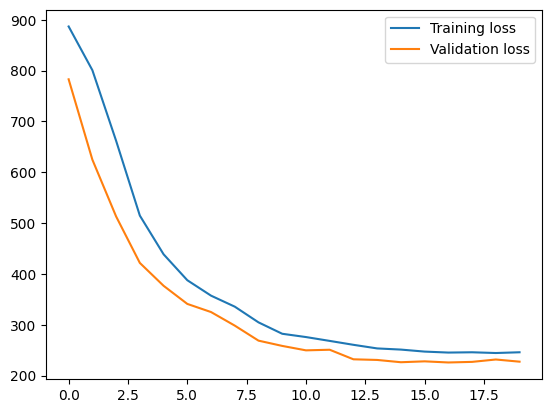

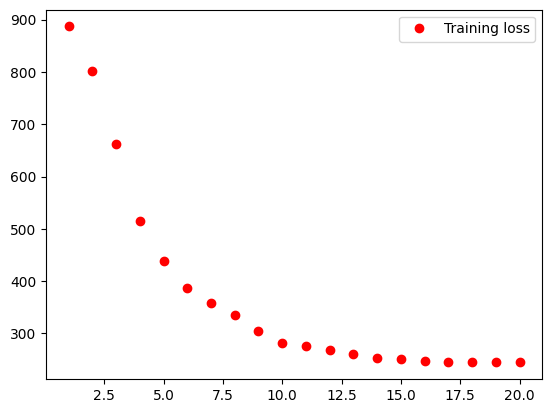

70/70 [==============================] - 0s 2ms/step


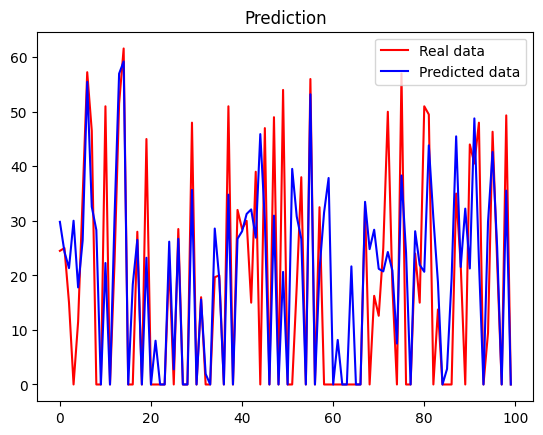

In [223]:
y_pred = ann.predict(X_test)
np.set_printoptions()
# print(np.concatenate((y_pred.reshape(len(y_pred),1), test_Y.reshape(len(test_Y),1)),1))

from matplotlib import pyplot

loss = history.history['loss']
acc = history.history['mae']
val_loss = history.history['val_loss']
val_acc = history.history['val_mae']
mape_loss=history.history['mape']
# pyplot.plot(history.history['mse'])
# pyplot.plot(history.history['mae'])
# pyplot.plot(history.history['mape'])
# pyplot.show()

pyplot.plot(history.history['loss'],label='Training loss')
pyplot.plot(history.history['val_loss'],label='Validation loss')
plt.legend()
pyplot.show()

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

y_pred = ann.predict(X_test)

plt.plot(y_test[:100], color = 'red', label = 'Real data')
plt.plot(y_pred[:100], color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [225]:
y_test1 = list(y_test)
y_pred1 = list(y_pred)

from sklearn.metrics import r2_score
score = r2_score(y_test1, y_pred1)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 53.0%


# LSTM ANN

In [284]:
df = pd.read_csv('717AUP_bus_occupancy.csv')

In [285]:
df = df[['Prem Nagar','date_time']]

In [286]:
def convert_to_datetime(date_string):
    return numpy.datetime64(datetime.strptime(str(date_string), '%Y-%m-%d %H:%M:%S'))

df['date_time']  = df['date_time'].apply(convert_to_datetime)

In [287]:
resample_dict = {'Prem Nagar':'mean'}
df = df.resample('15T',on='date_time').agg(resample_dict)

In [288]:
df.reset_index(inplace=True)
df.fillna(0,inplace=True)

In [289]:
df

,date_time,Prem Nagar
0,2019-07-01 04:45:00,19.000000
1,2019-07-01 05:00:00,25.000000
2,2019-07-01 05:15:00,21.333333
3,2019-07-01 05:30:00,23.000000
4,2019-07-01 05:45:00,28.750000
...,...,...
11195,2019-10-25 19:30:00,43.000000
11196,2019-10-25 19:45:00,47.000000
11197,2019-10-25 20:00:00,0.000000
11198,2019-10-25 20:15:00,0.000000


In [290]:
time_data = df['Prem Nagar'].values

In [291]:
time_data = time_data.reshape(-1,1)

In [292]:
train_data = time_data[:10200 ]
test_data = time_data[10200 :]

In [293]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_data_scaled = sc.fit_transform(train_data)
test_data_scaled = sc.transform(test_data)

In [294]:
def create_lstm_input(data, look_back):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(data[i + look_back])
    return np.array(X), np.array(Y)

In [295]:
look_back = 8
train_X, train_Y = create_lstm_input(train_data_scaled, look_back)
test_X, test_Y = create_lstm_input(test_data_scaled, look_back)

In [296]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [297]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [308]:
model = Sequential()
model.add(LSTM(units = 64, return_sequences = True, input_shape = (train_X.shape[1], train_X.shape[2])))
model.add(BatchNormalization())
model.add(LSTM(units = 32, return_sequences = True))
model.add(BatchNormalization())
model.add(LSTM(units = 32, return_sequences = False))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(units=1,activation='relu'))
model.compile(loss='mse', optimizer=keras.optimizers.Adam())
cp1 = ModelCheckpoint('model', save_best_only=True)
history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=10, callbacks=[cp1])

Epoch 1/10
317/319 [============================>.] - ETA: 0s - loss: 0.0492

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


319/319 [==============================] - 27s 68ms/step - loss: 0.0492 - val_loss: 0.0841
Epoch 2/10
317/319 [============================>.] - ETA: 0s - loss: 0.0362

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


319/319 [==============================] - 21s 64ms/step - loss: 0.0361 - val_loss: 0.0651
Epoch 3/10
318/319 [============================>.] - ETA: 0s - loss: 0.0320

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


319/319 [==============================] - 21s 66ms/step - loss: 0.0320 - val_loss: 0.0376
Epoch 4/10
317/319 [============================>.] - ETA: 0s - loss: 0.0300

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


319/319 [==============================] - 21s 67ms/step - loss: 0.0300 - val_loss: 0.0338
Epoch 5/10
319/319 [==============================] - 11s 35ms/step - loss: 0.0287 - val_loss: 0.0403
Epoch 6/10
319/319 [==============================] - 12s 37ms/step - loss: 0.0281 - val_loss: 0.0376
Epoch 7/10
319/319 [==============================] - 11s 35ms/step - loss: 0.0274 - val_loss: 0.0461
Epoch 8/10
319/319 [==============================] - 11s 36ms/step - loss: 0.0274 - val_loss: 0.0435
Epoch 9/10
319/319 [==============================] - 11s 36ms/step - loss: 0.0271 - val_loss: 0.0362
Epoch 10/10
319/319 [==============================] - ETA: 0s - loss: 0.0269

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


319/319 [==============================] - 23s 72ms/step - loss: 0.0269 - val_loss: 0.0321


In [309]:
# y_pred = model.predict(test_X)
# np.set_printoptions()
# # print(np.concatenate((y_pred.reshape(len(y_pred),1), test_Y.reshape(len(test_Y),1)),1))

# from matplotlib import pyplot

# loss = history.history['loss']
# # acc = history.history['mae']
# val_loss = history.history['val_loss']
# # val_acc = history.history['val_mae']
# # mape_loss=history.history['mape']
# # pyplot.plot(history.history['mse'])
# # pyplot.plot(history.history['mae'])
# # pyplot.plot(history.history['mape'])
# pyplot.show()

# epochs = range(1, len(loss)+1)
# plt.plot(epochs, loss, 'ro', label='Training loss')
# plt.legend()
# plt.show()

# y_pred = model.predict(test_X)

# plt.plot(test_Y[:100], color = 'red', label = 'Real data')
# plt.plot(y_pred[:100], color = 'blue', label = 'Predicted data')
# plt.title('Prediction')
# plt.legend()
# plt.show()

In [310]:
predicted_occupancy = (model.predict(test_X))

31/31 [==============================] - 2s 15ms/step


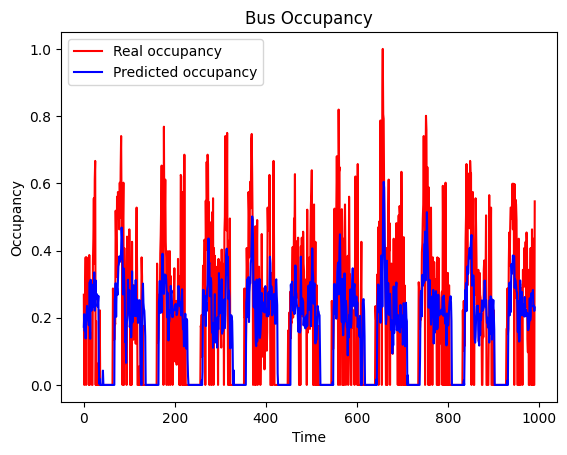

In [311]:
# plt.plot(sc.inverse_transform(test_Y)[:], color = 'red', label = 'Real occupancy')
plt.plot((test_Y)[:], color = 'red', label = 'Real occupancy')
plt.plot(predicted_occupancy[:], color = 'blue', label = 'Predicted occupancy')
plt.title('Bus Occupancy')
plt.xlabel('Time')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

In [312]:
# y_test1 = list(sc.inverse_transform(test_Y))
y_test1 = list((test_Y))
y_pred1 = list(predicted_occupancy)

from sklearn.metrics import r2_score
score = r2_score(y_test1, y_pred1)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 32.0%
